<a href="https://colab.research.google.com/github/HusnaRiyaz/ML-based-Toxicity-Prediction-of-drug-compounds/blob/main/AtomPair2D_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install padelpy

     |████████████████████████████████| 20.9 MB 55.8 MB/s 


In [ ]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2021-11-17 18:48:49--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2021-11-17 18:48:49--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-11-17 18:48:49 (89.0 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

In [ ]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("keggTox.smi", 
                  sep='\t', 
                  names=["Smiles", "ID", "Activity"])
df

,Smiles,ID,Activity
0,O=Cc1c(COP(=O)(O)O)cnc(c1O)C,D00006,0
1,OC(=O)C[C@@H](C(=O)O)N,D00013,0
2,SC[C@@H](C(=O)NCC(=O)O)NC(=O)CC[C@@H](C(=O)O)N,D00014,0
3,NC(=O)CC[C@@H](C(=O)O)N,D00015,0
4,OC[C@@H](C(=O)O)N,D00016,0
...,...,...,...
6711,CCCCO[C@H](OC[C@H](O)C)C,ZINC98359263,1
6712,O[N](=O)C1(CC=C(C=C1)c1ccccc1)[N](=O)O,ZINC98359292,1
6713,CCC1=C[C@@H](C(=S)C(=C1[N](=O)O)c1ccccc1)P(=O)...,ZINC98359314,1
6714,CCN(CCC(=C)C(=O)O)CC,ZINC98359322,1


In [ ]:
df.tail(2)

,Smiles,ID,Activity
6714,CCN(CCC(=C)C(=O)O)CC,ZINC98359322,1
6715,C1=CN=NN=NN=C1,ZINC98359352,1


In [ ]:
df2 = pd.concat( [df['Smiles'],df['ID']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,Smiles,ID
0,O=Cc1c(COP(=O)(O)O)cnc(c1O)C,D00006
1,OC(=O)C[C@@H](C(=O)O)N,D00013
2,SC[C@@H](C(=O)NCC(=O)O)NC(=O)CC[C@@H](C(=O)O)N,D00014
3,NC(=O)CC[C@@H](C(=O)O)N,D00015
4,OC[C@@H](C(=O)O)N,D00016
...,...,...
6711,CCCCO[C@H](OC[C@H](O)C)C,ZINC98359263
6712,O[N](=O)C1(CC=C(C=C1)c1ccccc1)[N](=O)O,ZINC98359292
6713,CCC1=C[C@@H](C(=S)C(=C1[N](=O)O)c1ccccc1)P(=O)...,ZINC98359314
6714,CCN(CCC(=C)C(=O)O)CC,ZINC98359322


In [ ]:

from padelpy import padeldescriptor

fingerprint = 'AtomPairs2D'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,AD2D1,AD2D2,AD2D3,AD2D4,AD2D5,AD2D6,AD2D7,AD2D8,AD2D9,AD2D10,AD2D11,AD2D12,AD2D13,AD2D14,AD2D15,AD2D16,AD2D17,AD2D18,AD2D19,AD2D20,AD2D21,AD2D22,AD2D23,AD2D24,AD2D25,AD2D26,AD2D27,AD2D28,AD2D29,AD2D30,AD2D31,AD2D32,AD2D33,AD2D34,AD2D35,AD2D36,AD2D37,AD2D38,AD2D39,...,AD2D741,AD2D742,AD2D743,AD2D744,AD2D745,AD2D746,AD2D747,AD2D748,AD2D749,AD2D750,AD2D751,AD2D752,AD2D753,AD2D754,AD2D755,AD2D756,AD2D757,AD2D758,AD2D759,AD2D760,AD2D761,AD2D762,AD2D763,AD2D764,AD2D765,AD2D766,AD2D767,AD2D768,AD2D769,AD2D770,AD2D771,AD2D772,AD2D773,AD2D774,AD2D775,AD2D776,AD2D777,AD2D778,AD2D779,AD2D780
0,D00013,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,D00006,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,D00015,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,D00014,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,D00016,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,ZINC98359292,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6712,ZINC98359314,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6713,ZINC98359322,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6714,ZINC98359352,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = descriptors.drop('Name', axis=1)
y = df['Activity']

In [ ]:
print(X.shape, y.shape)

(6716, 780) (6716,)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,AD2D2,AD2D3,AD2D4,AD2D7,AD2D12,AD2D80,AD2D81,AD2D82,AD2D85,AD2D90,AD2D91,AD2D92,AD2D102,AD2D158,AD2D159,AD2D160,AD2D163,AD2D168,AD2D169,AD2D170,AD2D180,AD2D236,AD2D237,AD2D238,AD2D241,AD2D246,AD2D247,AD2D248,AD2D258,AD2D313,AD2D314,AD2D315,AD2D316,AD2D319,AD2D324,AD2D325,AD2D326,AD2D336,AD2D391,AD2D392,AD2D393,AD2D394,AD2D397,AD2D402,AD2D403,AD2D404,AD2D414,AD2D469,AD2D470,AD2D471,AD2D472,AD2D475,AD2D480,AD2D482,AD2D492,AD2D547,AD2D548,AD2D549,AD2D550,AD2D558,AD2D560,AD2D570,AD2D625,AD2D626,AD2D627,AD2D636,AD2D638,AD2D648,AD2D703,AD2D704,AD2D705,AD2D714
0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0
4,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,1,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6712,1,0,1,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6713,1,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6714,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#X_train, X_test, y_train, y_test = train_test_split(X_train, y_test, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((5372, 72), (1344, 72))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

model = RandomForestClassifier(max_depth=70, min_samples_leaf=3, min_samples_split=19, n_estimators=500, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=3, min_samples_split=19,
                       n_estimators=500, random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
print (f'Train Accuracy - : {model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.751
Test Accuracy - : 0.697


In [ ]:
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.49883671231723514

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_test

0.38232838704404853

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
cv_scores

array([0.67, 0.66, 0.64, 0.65, 0.65])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.6535588184297221

In [ ]:
model_name = pd.Series(['Random forest'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,Random forest,0.498837,0.653559,0.382328


In [ ]:
# Import needed packages
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.75       740
           1       0.71      0.53      0.61       604

    accuracy                           0.69      1344
   macro avg       0.70      0.68      0.68      1344
weighted avg       0.69      0.69      0.68      1344



In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[607, 133],
       [282, 322]])

0.672424061941632


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion_Matrix
[[677 248]
 [302 452]]


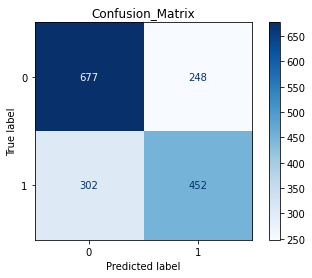

In [ ]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
result = classifier.predict(X_test)
Score = metrics.accuracy_score(y_test, result)
print(Score)

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
title = "Confusion_Matrix"
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       925
           1       0.65      0.60      0.62       754

    accuracy                           0.67      1679
   macro avg       0.67      0.67      0.67      1679
weighted avg       0.67      0.67      0.67      1679



In [ ]:
mcc_test = matthews_corrcoef(y_test, result)
mcc_test

0.3342859117987435

In [ ]:
from sklearn.model_selection import cross_val_score
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
cv_scores

array([0.7 , 0.69, 0.68, 0.69, 0.68])

In [ ]:
mcc_cv = cv_scores.mean()
mcc_cv

0.6869138254441134

In [ ]:
model_name = pd.Series(['SVM'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name, mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)
performance_metrics

,Name,MCC_train,MCC_cv,MCC_test
0,SVM,0.507198,0.686914,0.334286
